In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('playstore-analysis (2) (1).csv')

In [3]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2988,Top Mercato: football news,SPORTS,4.3,16016,6900.0,"1,000,000+",Free,0,Everyone,Sports,"January 7, 2016",2.7.0,4.2 and up
6713,GearBest Online Shopping,SHOPPING,4.5,245104,35000.0,"5,000,000+",Free,0,Everyone,Shopping,"August 1, 2018",3.6.0,4.0.3 and up
6932,BW Switch,GAME,NaN,1,13000.0,10+,Free,0,Everyone,Arcade,"April 16, 2018",1.25,4.1 and up
5597,WiFi Baby Monitor - NannyCam,VIDEO_PLAYERS,4.1,29867,1700.0,"5,000,000+",Free,0,Everyone,Video Players & Editors,"May 24, 2017",3.1.0 (build 1210),2.3.3 and up
6428,BL File Explorer,TOOLS,NaN,1,421.0,50+,Paid,$1.99,Everyone,Tools,"July 18, 2014",1.5.140718,1.5 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [5]:
df.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [6]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10841, dtype: bool

## 1. Data clean up – Missing value treatment
a. Drop records where rating is missing since rating is our target/study variable

b. Check the null values for the Android Ver column. 

i. Are all 3 records having the same problem?

ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

iii. Replace remaining missing values with the mode

c. Current ver – replace with most common value

In [7]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

b. Check the null values for the Android Ver column. 

In [8]:
df1 = df.dropna(subset=['Rating'])

In [9]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

#### b. Check the null values for the Android Ver column.
i. Are all 3 records having the same problem?

In [10]:
df1[df1.isna().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.000000,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.000000,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.000000,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.000000,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
df1[df1.isna().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.000000,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.000000,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.000000,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.000000,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [12]:
df2 = df1.drop(10472)

In [13]:
life_made = df2[df2['App']=='Life Made WI-Fi Touchscreen Photo Frame']
print(life_made)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


iii. Replace remaining missing values with the mode

In [14]:
import statistics as s

In [15]:
df3 = df2.fillna(s.mode(df2['Android Ver']))

In [16]:
df3.loc[[4453,4490]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,4.1 and up
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,4.1 and up


In [17]:
df3.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#### c. Current ver – replace with most common value

In [18]:
df3['Current Ver'].isnull().sum()

0

There is Zero Null Values so no need to replace the values.

## 2. Data clean up – correcting the data types
a. Which all variables need to be brought to numeric types?

b. Price variable – remove $ sign and convert to float

c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

d. Convert all other identified columns to numeric

In [19]:
df3.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.3+ MB


#### a. Which all variables need to be brought to numeric types?

In [21]:
df3['Reviews'] = df3['Reviews'].astype(int)

In [22]:
df3['Size'] = df3['Size'].astype(int)

#### b. Price variable – remove $ sign and convert to float

In [23]:
df3['Price'] = df3['Price'].str.replace('$',' ')

C:\Users\91831\AppData\Local\Temp/ipykernel_23352/1781799330.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df3['Price'] = df3['Price'].str.replace('$',' ')


In [24]:
df3['Price'] = df3['Price'].astype(float)

In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   int32  
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), int32(2), object(9)
memory usage: 1.2+ MB


#### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [26]:
df3['Installs'] = df3['Installs'].str.replace('+','')

C:\Users\91831\AppData\Local\Temp/ipykernel_23352/4087702248.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df3['Installs'] = df3['Installs'].str.replace('+','')


In [27]:
df3['Installs'] = df3['Installs'].str.replace(',','')

In [28]:
df3.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [29]:
df3['Installs'] = df3['Installs'].astype(int)

#### d. Convert all other identified columns to numeric

In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   int32  
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), int32(3), object(8)
memory usage: 1.1+ MB


## 3. Sanity checks – check for the following and handle accordingly
a. Avg. rating should be between 1 and 5, as only these values are allowed on the play 
store.

i. Are there any such records? Drop if so.

b. Reviews should not be more than installs as only those who installed can review the 
app.

i. Are there any such records? Drop if so.

In [31]:
df3.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

In [32]:
df3['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

#### i. Are there any such records? Drop if so.

There are no such records with rating less than 1 or greater than 5.

#### b. Reviews should not be more than installs as only those who installed can review the app

In [33]:
df3.loc[df3['Reviews'] > df3['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


Yes, there are 7 records where Review is greater than Installs.

###### i. Are there any such records? Drop if so.

In [34]:
df3.drop(df3[df3['Reviews']>df3['Installs']].index,inplace=True)

In [35]:
df3.loc[df3['Reviews'] > df3['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## 4. Identify and handle outliers – 
a. Price column

i. Make suitable plot to identify outliers in price

ii. Do you expect apps on the play store to cost $200? Check out these cases

iii. After dropping the useless records, make the suitable plot again to identify 
outliers

iv. Limit data to records with price < $30

b. Reviews column

i. Make suitable plot

ii. Limit data to apps with < 1 Million reviews

c. Installs

i. What is the 95th percentile of the installs?

ii. Drop records having a value more than the 95th percentile

In [36]:
df3.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

i. Make suitable plot to identify outliers in price

C:\Users\91831\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


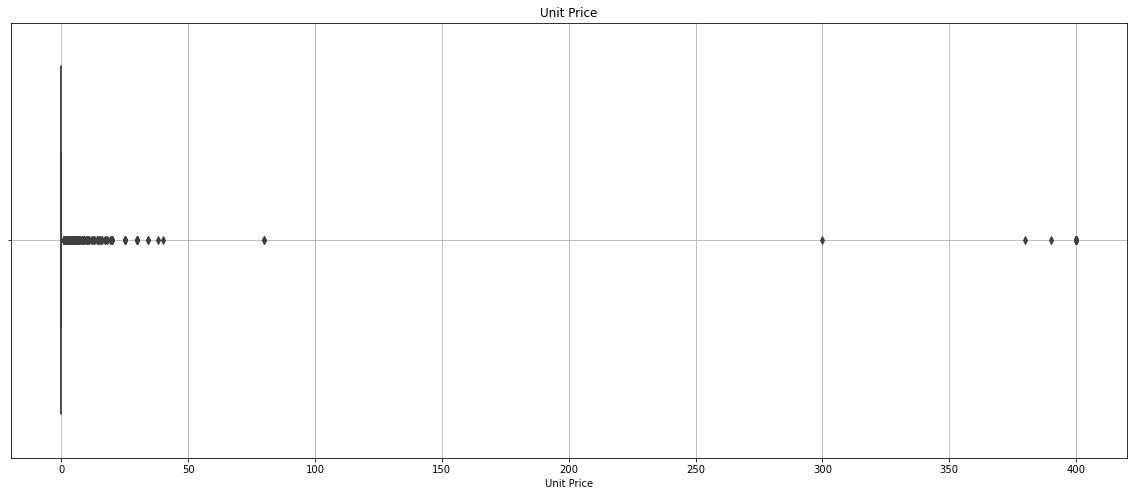

In [37]:
plt.subplots(figsize=(20,8))
sns.boxplot('Price',data=df3)
plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid(linestyle='-')

ii. Do you expect apps on the play store to cost $200? Check out these cases

In [38]:
waste_data = df3[df3['Price']==200]
print(waste_data)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [39]:
usefull_df = df3[df3['Price'] != 0]

iii. After dropping the useless records, make the suitable plot again to identify outliers

C:\Users\91831\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


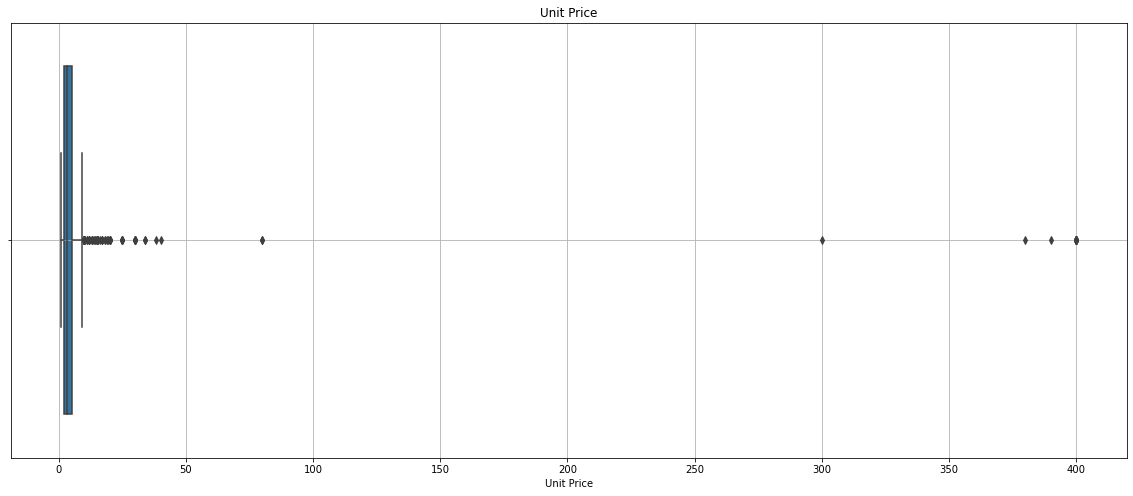

In [40]:
plt.subplots(figsize=(20,8))
sns.boxplot(usefull_df.Price)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid()

iv. Limit data to records with price < $30

In [41]:
limit_data = df3[df3['Price'] < 30]
limit_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [42]:
limit_data.shape

(9338, 13)

C:\Users\91831\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


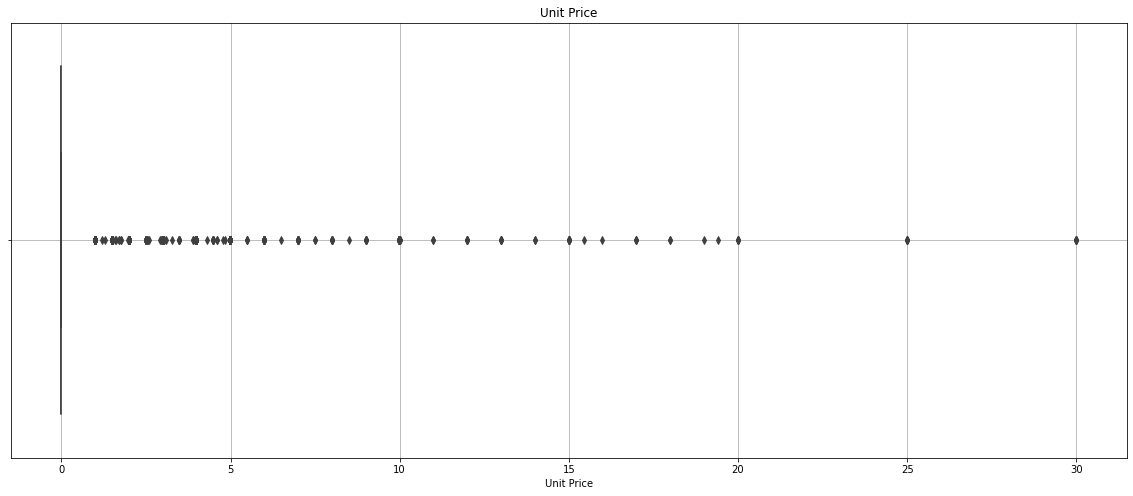

In [43]:
plt.subplots(figsize=(20,8))
sns.boxplot(limit_data.Price)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid()

#### b. Reviews column

i. Make suitable plot


In [78]:
df3.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Buckets
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,VERY LOW
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,VERY LOW
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,VERY LOW


Category
GAME                   1585419555
COMMUNICATION           815461799
SOCIAL                  621241071
FAMILY                  410223081
TOOLS                   273182982
PHOTOGRAPHY             213516607
SHOPPING                115041033
PRODUCTIVITY            114116717
VIDEO_PLAYERS           110379692
PERSONALIZATION          89345815
SPORTS                   70779551
TRAVEL_AND_LOCAL         62617772
ENTERTAINMENT            59178154
NEWS_AND_MAGAZINES       54399899
EDUCATION                39595010
HEALTH_AND_FITNESS       37893622
MAPS_AND_NAVIGATION      30659060
BOOKS_AND_REFERENCE      21958660
FINANCE                  17550406
WEATHER                  14604695
BUSINESS                 13954086
LIFESTYLE                12871520
FOOD_AND_DRINK            8883009
DATING                    7291039
HOUSE_AND_HOME            3976004
COMICS                    3350614
ART_AND_DESIGN            1714372
MEDICAL                   1585618
AUTO_AND_VEHICLES         1163630
LIBRA

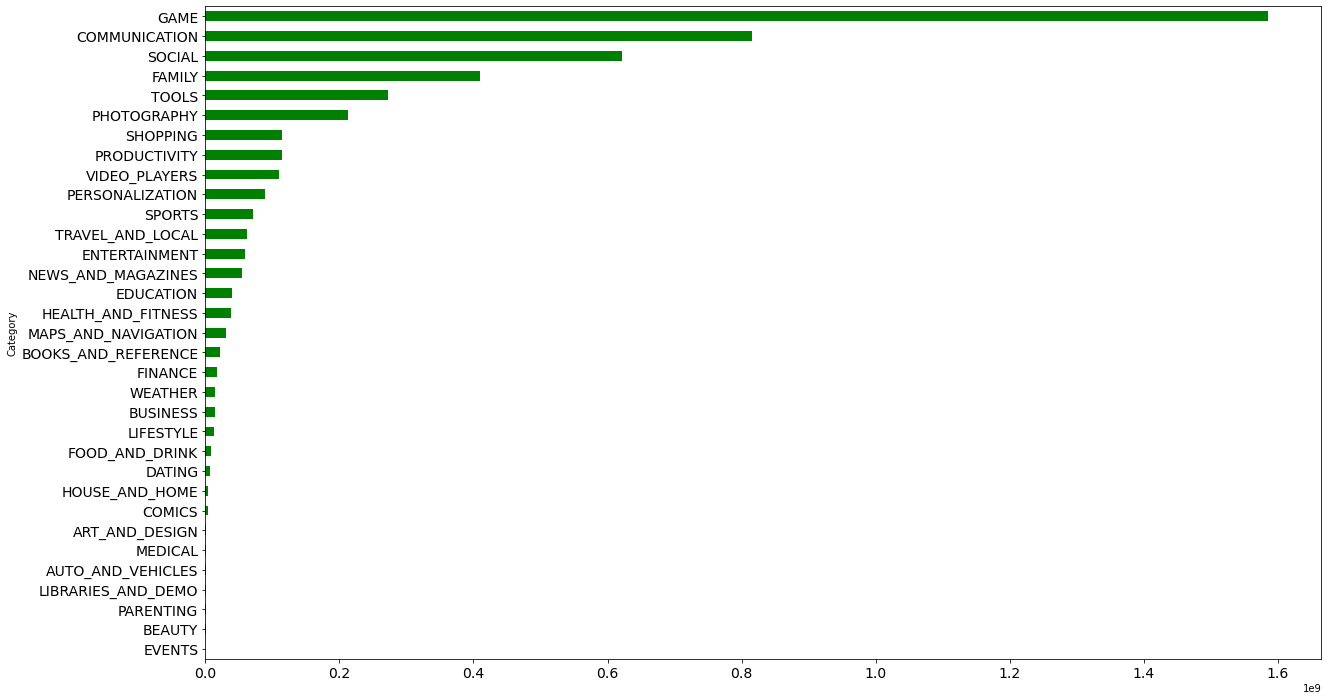

In [81]:
review = df3.groupby('Category')['Reviews'].sum().sort_values()
plt.subplots(figsize=(20,12))
review.plot(kind='barh', fontsize=14,color='g')
print(review.sort_values(ascending=False))

Observation: From the above visualization, it can be interpreted that the top categories with highest installs are Game,Communication,Social,Family & Tools.

##### ii. Limit data to apps with < 1 Million reviews

In [46]:
limit_df3 = df3[df3['Reviews'] < 1000000]
limit_df3.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [47]:
limit_df3.shape

(8655, 13)

In [48]:
parcentile = df3.Installs.quantile(0.95) # 95th percentile
print(parcentile)

100000000.0


In [49]:
x = df3.Installs.quantile() > parcentile
print (x)

False


## Data analysis to answer business questions
1) What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
a. How do you explain this?

b. What is the implication of this on your analysis?


C:\Users\91831\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


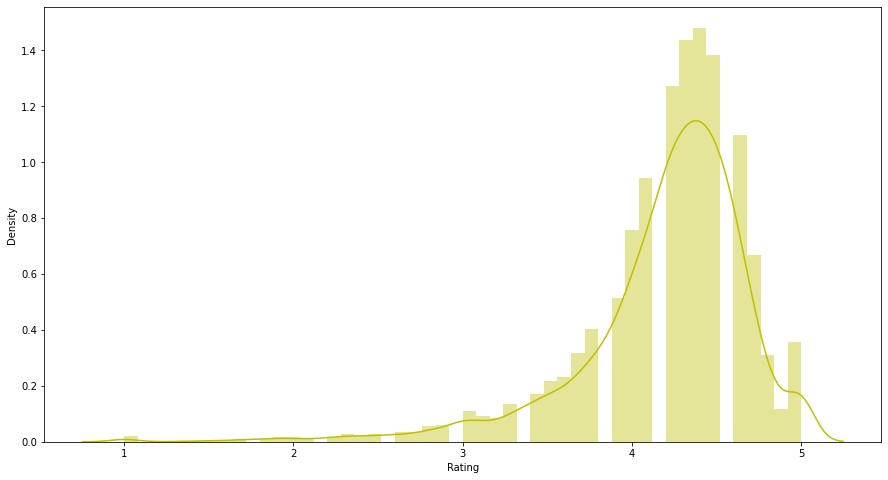

In [82]:
plt.figure(figsize=(15,8))
sns.distplot(df3['Rating'],color='y')
plt.show()

Observation: From the above graph we can come to a conclusion that most of the apps in google playstore are rated in between 3.5 to 4.8.

## 6. What are the top Content Rating values?
a. Are there any values with very few records?

b. If yes, drop those as they won’t help in the analysis

In [51]:
df3['Content Rating'].value_counts()

Everyone           7414
Teen               1083
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [52]:
df3[df3['Content Rating']=='Adults only 18+']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4900,500000,Free,0.0,Adults only 18+,Comics,"July 4, 2018",1.1.7.0,4.1 and up
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41000,1000000,Free,0.0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
6424,Manga Books,COMICS,3.8,7326,21516,500000,Free,0.0,Adults only 18+,Comics,"August 3, 2018",Varies with device,Varies with device


In [53]:
Adult_only = df3[df3['Content Rating'] == 'Adults only 18+'].index.to_list()

In [54]:
df3.drop(Adult_only,inplace=True)

In [55]:
Unrated = df3[df3['Content Rating'] == 'Unrated'].index.to_list()

In [56]:
df3.drop(Unrated,inplace=True)

In [57]:
df3['Content Rating'].value_counts()

Everyone        7414
Teen            1083
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

<AxesSubplot:ylabel='Content Rating'>

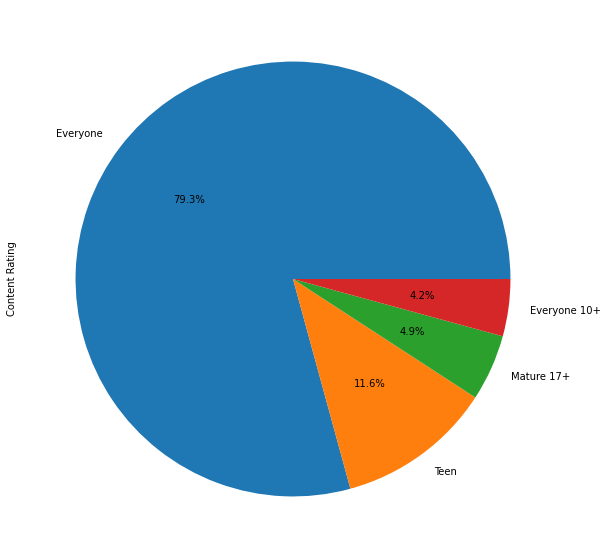

In [58]:
df3['Content Rating'].value_counts().plot(kind='pie',autopct='%0.1f%%',figsize=(15,10))

## 7. Effect of size on rating
a. Make a joinplot to understand the effect of size on rating

b. Do you see any patterns?

c. How do you explain the pattern?

In [59]:
df3.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


<Figure size 1296x72 with 0 Axes>

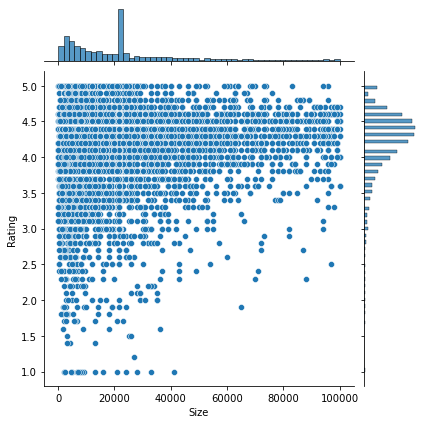

In [60]:
plt.figure(figsize=(18,1))
sns.jointplot(x='Size',y='Rating',data=df3)
plt.show()

#### b. Do you see any patterns?

Yes, patterns can be observed between Size and Rating ie. their is correlation between Size and Rating.

#### c. How do you explain the pattern?

Generally on increasing Rating, Size of App also increases. But this is not always true ie. for higher Rating, their is constant Size. Thus we can conclude that their is positive correlation between Size and Rating.

## 8. Effect of price on rating
a. Make a jointplot (with regression line)

b. What pattern do you see?

c. How do you explain the pattern?

d. Replot the data, this time with only records with price > 0 

e. Does the pattern change?

f. What is your overall inference on the effect of price on the rating

In [61]:
df.sample(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10157,EZ LED,TOOLS,2.2,19,2100.0,"1,000+",Free,0,Everyone,Tools,"September 5, 2017",1.1,4.3 and up
9749,Mom Doctor ER Emergency Family Game,FAMILY,3.5,173,49000.0,"10,000+",Free,0,Everyone,Educational,"January 26, 2018",1.0.0,4.1 and up
8975,SportCAM,TOOLS,3.2,427,9500.0,"100,000+",Free,0,Everyone,Tools,"May 4, 2018",1.7.6,2.2 and up


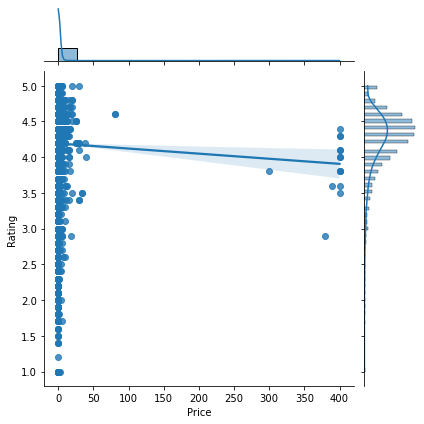

In [62]:
sns.jointplot(x='Price',y='Rating',data=df3,kind='reg')

#### b. What pattern do you see?

Generally on increasing the Price, Rating remains almost constant greater than 4.

#### c. How do you explain the pattern?

Since on increasing the Price, Rating remains almost constant greater than 4. Thus it can be concluded that their is very weak Positive correlation between Rating and Price. 

### d. Replot the data, this time with only records with price > 0

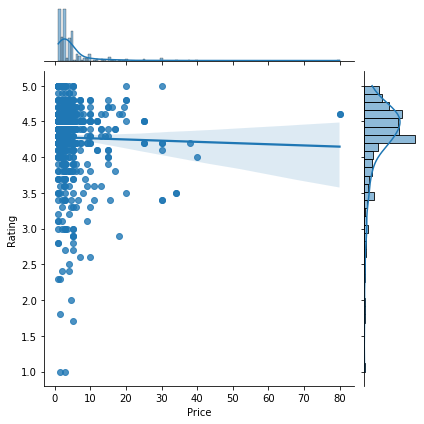

In [63]:
Price_limit = df3[df3['Price'] > 0]
Price_limit = Price_limit[Price_limit['Price'] < 200] ## we use this for remove Outliers.
sns.jointplot(x ="Price",y="Rating",data = Price_limit, kind = "reg" )

#### e. Does the pattern change?

Yes, On limiting the record with Price > 0, the overall pattern changed a slight ie their is very weakly Negative Correlation between Price and Rating.

In [64]:
Price_limit.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.042835,0.108457,0.058395,-0.020949
Reviews,0.042835,1.000000,0.034472,0.867281,0.005815
Size,0.108457,0.034472,1.000000,0.073834,0.050307
Installs,0.058395,0.867281,0.073834,1.000000,-0.019315
Price,-0.020949,0.005815,0.050307,-0.019315,1.000000


#### f. What is your overall inference on the effect of price on the rating

Generally increasing the Prices, doesn't have signifcant effect on Higher Rating. For Higher Price, Rating is High and almost constant ie greater than 4

In [65]:
Price_limit.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up


C:\Users\91831\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

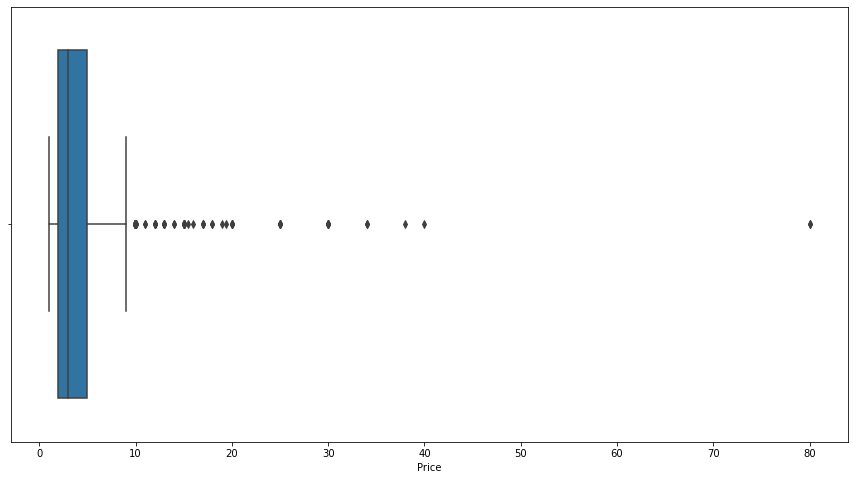

In [66]:
plt.figure(figsize=(15,8))
sns.boxplot(Price_limit['Price'])

<Figure size 1080x576 with 0 Axes>

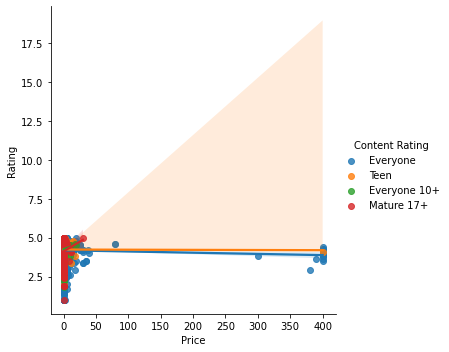

In [67]:
plt.figure(figsize=(15,8))
sns.lmplot(x='Price', y='Rating', hue ='Content Rating', data=df3)

## 9. Look at all the numeric interactions together – 
a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

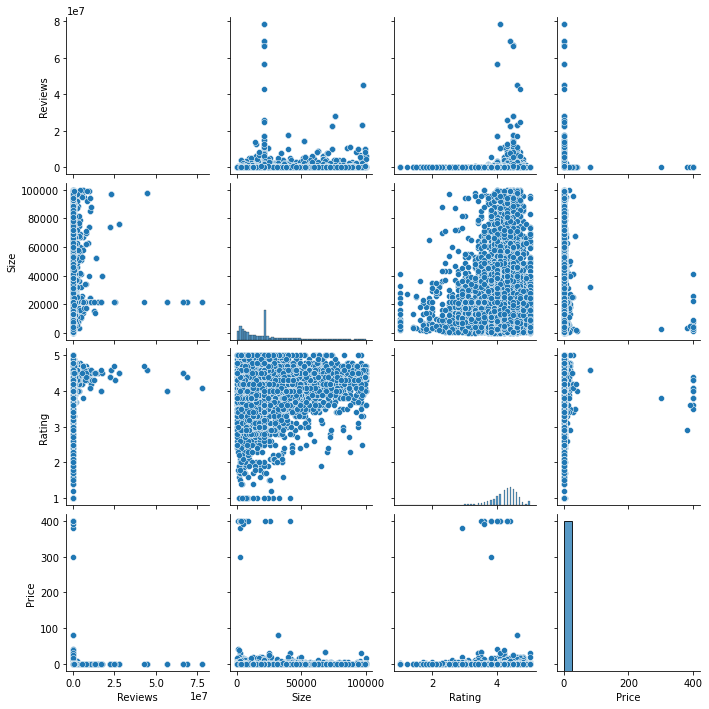

In [68]:
sns.pairplot(df3,vars=['Reviews','Size','Rating','Price'])

## 10. Rating vs. content rating
a. Make a bar plot displaying the rating for each content rating

b. Which metric would you use? Mean? Median? Some other quantile?

c. Choose the right metric and plot

In [69]:
df3.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

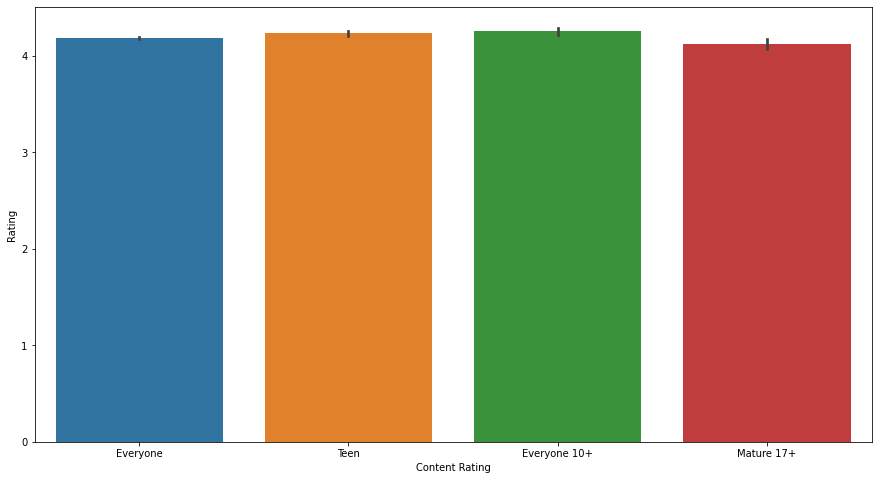

In [70]:
plt.figure(figsize=(15,8))
sns.barplot(x='Content Rating',y='Rating',data=df3)

b. Which metric would you use? Mean? Median? Some other quantile?

C:\Users\91831\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

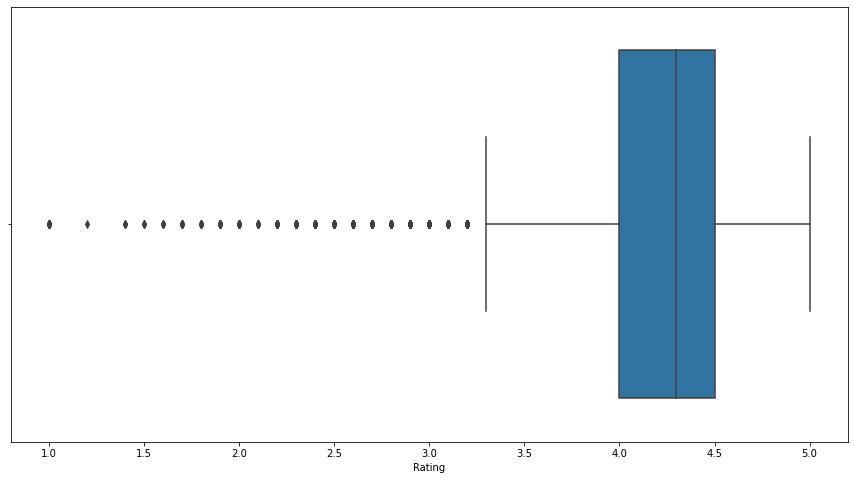

In [71]:
plt.figure(figsize=(15,8))
sns.boxplot(df3['Rating'])

We must use Median in this case as we are having Outliers in Rating. Because in case of Outliers , median is the best measure of central tendency.

#### c. Choose the right metric and plot

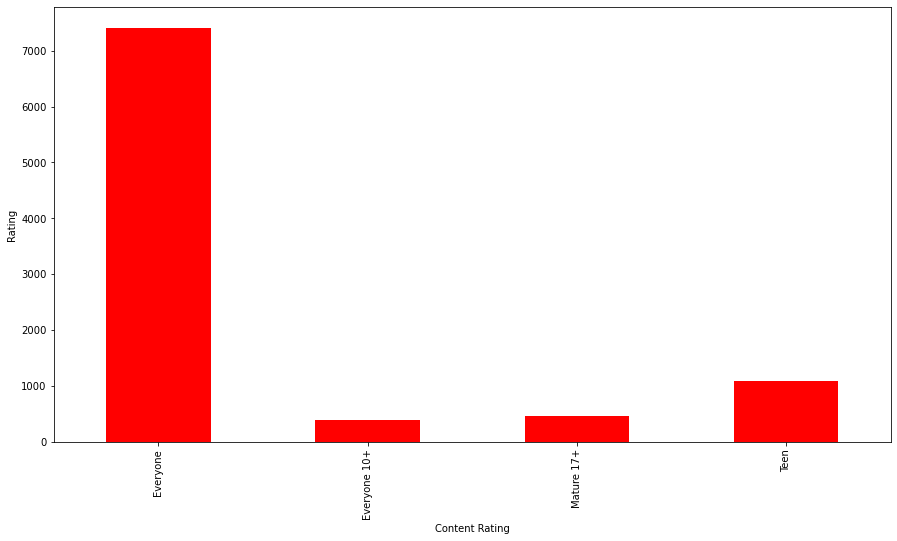

In [72]:
plt.figure(figsize=(15,8))
df3.groupby(['Content Rating'])['Rating'].count().plot.bar(color="r")
plt.ylabel('Rating')
plt.show()

## 11. Content rating vs. size vs. rating – 3 variables at a time
a. Create 5 buckets (20% records in each) based on Size

b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each 
combination

c. Make a heatmap of this

i. Annotated

ii. Greens color map

d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

C:\Users\91831\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Size', ylabel='Density'>

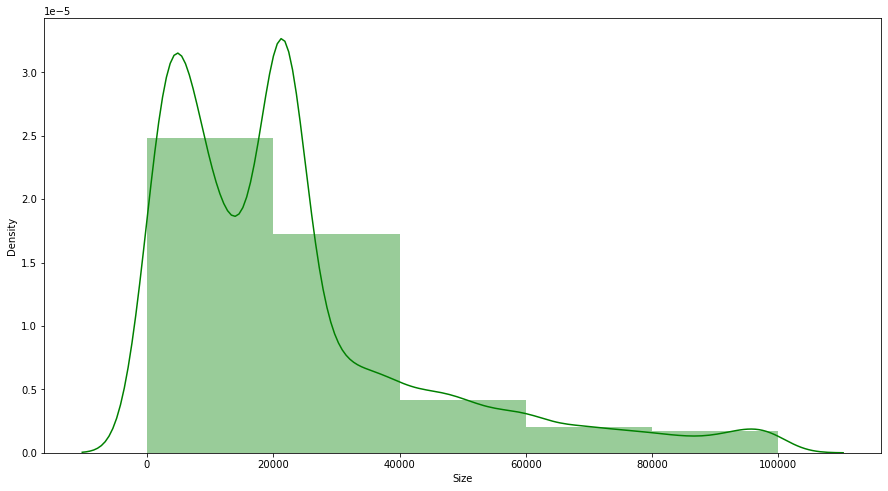

In [73]:
plt.figure(figsize=(15,8))
sns.distplot(df3["Size"], bins=5,color='g')

In [74]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
df3['Size_Buckets'] = pd.cut(df3['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])
pd.pivot_table(df3, values='Rating', index='Size_Buckets', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,4.148721,4.247561,4.015183,4.187047
LOW,4.228845,4.197802,4.195109,4.237590
MED,4.192505,4.265957,4.202222,4.270896
HIGH,4.271774,4.374000,4.190909,4.291045
VERY HIGH,4.280000,4.405556,4.252632,4.314815


b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [75]:
temp3=pd.pivot_table(df3, values='Rating', index='Size_Buckets', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
temp3

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,3.8,4.02,3.5,3.9
LOW,4.0,4.00,4.0,4.0
MED,3.9,4.10,4.1,4.0
HIGH,4.0,4.20,4.0,4.0
VERY HIGH,4.1,4.30,4.0,4.1


## c. Make a heatmap of this

i. Annotated

<AxesSubplot:xlabel='Content Rating', ylabel='Size_Buckets'>

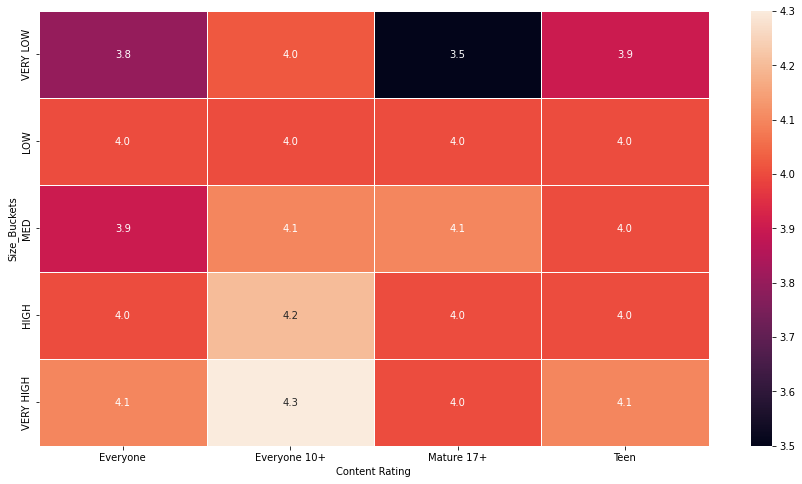

In [76]:
f,ax = plt.subplots(figsize=(15, 8))
sns.heatmap(temp3, annot=True, linewidths=.5, fmt='.1f',ax=ax)

ii. Greens color map

<AxesSubplot:xlabel='Content Rating', ylabel='Size_Buckets'>

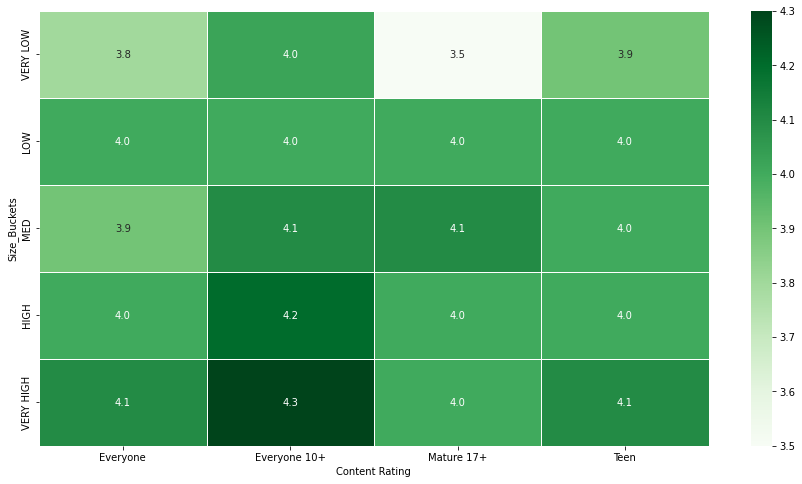

In [77]:
f,ax = plt.subplots(figsize=(15, 8))
sns.heatmap(temp3, annot=True, linewidths=.5,cmap='Greens',fmt='.1f',ax=ax)

d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

Based on analysis, its not true that lighter apps are preferred in all categories. Because apps with size 40k-60k and 80k-100k have got the highest rating in all cateegories. So, in general we can conclude that heavier apps are preferred in all categories.